In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import operator
from sklearn.preprocessing import MultiLabelBinarizer
from collections import Counter

In [2]:
df = pd.read_csv('train (1).csv')

# 목표 변수 값에 영향을 미치는 요인 변수

In [3]:
corr_df = df.corr() #전체 데이터에 대해 상관계수 구함
di_corr = {'Columns':corr_df['SalePrice'].index, 'Corr':corr_df['SalePrice'].values}
# di_corr: SalePrice에 대한 상관계수들, 해당하는 컬럼명과 계수를 딕셔너리로 구분 저장
corr_df = pd.DataFrame(di_corr)
corr_df = corr_df.sort_values(by='Corr', ascending=False)
#sort_values를 통해 계수를 기준 내림차순 정렬.

In [4]:
# SalePrice에 높은 상관관계를 갖는 상위 10개 변수
df_cor= corr_df[1:11].copy()
df_cor

,Columns,Corr
4,OverallQual,0.790982
16,GrLivArea,0.708624
26,GarageCars,0.640409
27,GarageArea,0.623431
12,TotalBsmtSF,0.613581
13,1stFlrSF,0.605852
19,FullBath,0.560664
23,TotRmsAbvGrd,0.533723
6,YearBuilt,0.522897
7,YearRemodAdd,0.507101


### MSZoning, Condition1, YearBuilt, Bedroom 중 YearBuilt 만이 상위10개 안에 꼽힐 정도의 상관관계를 갖는다.

In [5]:
df_object = df['SalePrice']

In [6]:
condition = pd.get_dummies(df['Condition1'])
df_condition = pd.concat([df_object,condition], axis=1)
df_condition = df_condition.corr()
df_condition.head(1)

,SalePrice,Artery,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNe,RRNn
SalePrice,1.0,-0.106401,-0.117329,0.112968,0.042017,0.049541,-0.046651,0.005893,0.004584,0.023236


In [7]:
MSZoning = pd.get_dummies(df['MSZoning'])
df_MSZoning = pd.concat([df_object,MSZoning], axis=1)
df_MSZoning = df_MSZoning.corr()
df_MSZoning.head(1)

,SalePrice,C (all),FV,RH,RL,RM
SalePrice,1.0,-0.111257,0.08995,-0.065429,0.245063,-0.288065


In [8]:
df[['Id','SalePrice','Condition1','YearBuilt','BedroomAbvGr']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            1460 non-null   int64 
 1   SalePrice     1460 non-null   int64 
 2   Condition1    1460 non-null   object
 3   YearBuilt     1460 non-null   int64 
 4   BedroomAbvGr  1460 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 57.2+ KB


In [9]:
pd.crosstab(df.SalePrice,df.MSZoning).head()

MSZoning,C (all),FV,RH,RL,RM
SalePrice,,,,,
34900,1,0,0,0,0
35311,1,0,0,0,0
37900,0,0,0,0,1
39300,0,0,0,1,0
40000,1,0,0,0,0


# 시각화

In [10]:
corr_df.Columns

37        SalePrice
4       OverallQual
16        GrLivArea
26       GarageCars
27       GarageArea
12      TotalBsmtSF
13         1stFlrSF
19         FullBath
23     TotRmsAbvGrd
6         YearBuilt
7      YearRemodAdd
25      GarageYrBlt
8        MasVnrArea
24       Fireplaces
9        BsmtFinSF1
2       LotFrontage
28       WoodDeckSF
14         2ndFlrSF
29      OpenPorchSF
20         HalfBath
3           LotArea
17     BsmtFullBath
11        BsmtUnfSF
21     BedroomAbvGr
32      ScreenPorch
33         PoolArea
35           MoSold
31        3SsnPorch
10       BsmtFinSF2
18     BsmtHalfBath
34          MiscVal
0                Id
15     LowQualFinSF
36           YrSold
5       OverallCond
1        MSSubClass
30    EnclosedPorch
22     KitchenAbvGr
Name: Columns, dtype: object

OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

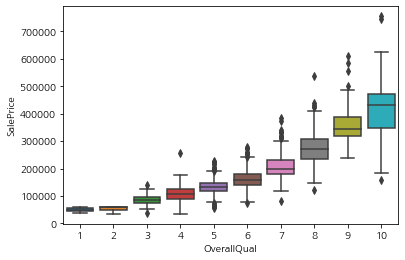

In [11]:
#print(pd.get_dummies(df['OverallQual']).sum())
sns.boxplot(y=df['SalePrice'],x=df['OverallQual'])

Unique한 건축 년도 개수 112


<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

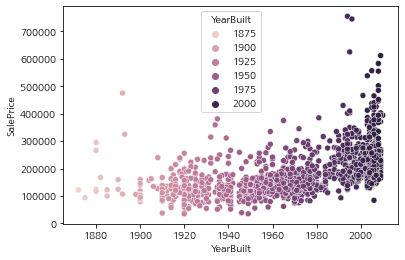

In [12]:
print('Unique한 건축 년도 개수',len(Counter(df['YearBuilt'])))
sns.scatterplot(y='SalePrice',x='YearBuilt',hue='YearBuilt',data=df)

오래될 수록 가격이 낮아짐을 알 수 있다. (분명 예외 상황 존재)

평방 피트 종류 861


<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

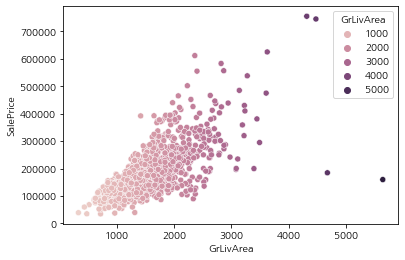

In [13]:
print('평방 피트 종류',len(Counter(df['GrLivArea'])))
sns.scatterplot(y='SalePrice',x='GrLivArea',hue='GrLivArea',data=df)

C (all)      10
FV           65
RH           16
RL         1151
RM          218
dtype: int64


<AxesSubplot:xlabel='MSZoning', ylabel='SalePrice'>

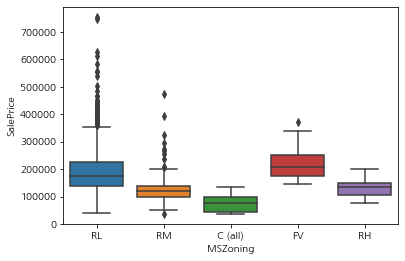

In [14]:
print(pd.get_dummies(df['MSZoning']).sum())
sns.boxplot(y=df['SalePrice'],x=df['MSZoning'])

Grvl       6
Pave    1454
dtype: int64


<AxesSubplot:xlabel='Street', ylabel='SalePrice'>

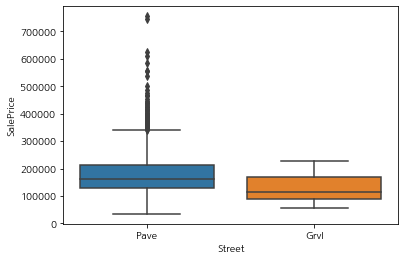

In [15]:
print(pd.get_dummies(df['Street']).sum())
sns.boxplot(y=df['SalePrice'],x=df['Street'])

Grvl    50
Pave    41
dtype: int64


<AxesSubplot:xlabel='Alley', ylabel='SalePrice'>

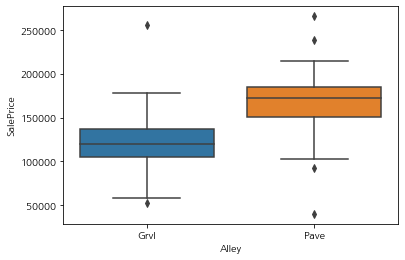

In [16]:
print(pd.get_dummies(df['Alley']).sum())
sns.boxplot(y=df['SalePrice'],x=df['Alley'])

IR1    484
IR2     41
IR3     10
Reg    925
dtype: int64


<AxesSubplot:xlabel='LotShape', ylabel='SalePrice'>

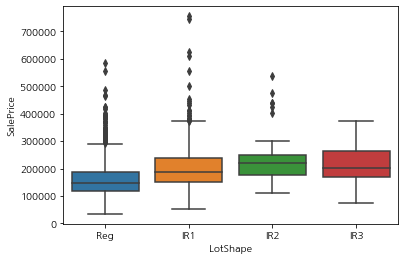

In [17]:
print(pd.get_dummies(df['LotShape']).sum())
sns.boxplot(y=df['SalePrice'],x=df['LotShape'])

# 상관계수

In [24]:
final_corr = df.corr()
final_corr

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


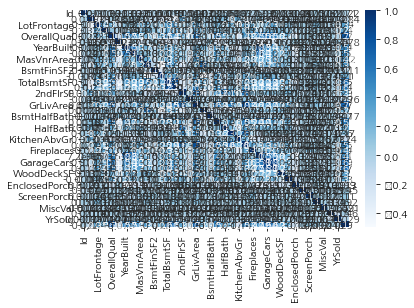

In [28]:
sns.heatmap(final_corr,cmap='Blues', annot = True)

<AxesSubplot:>

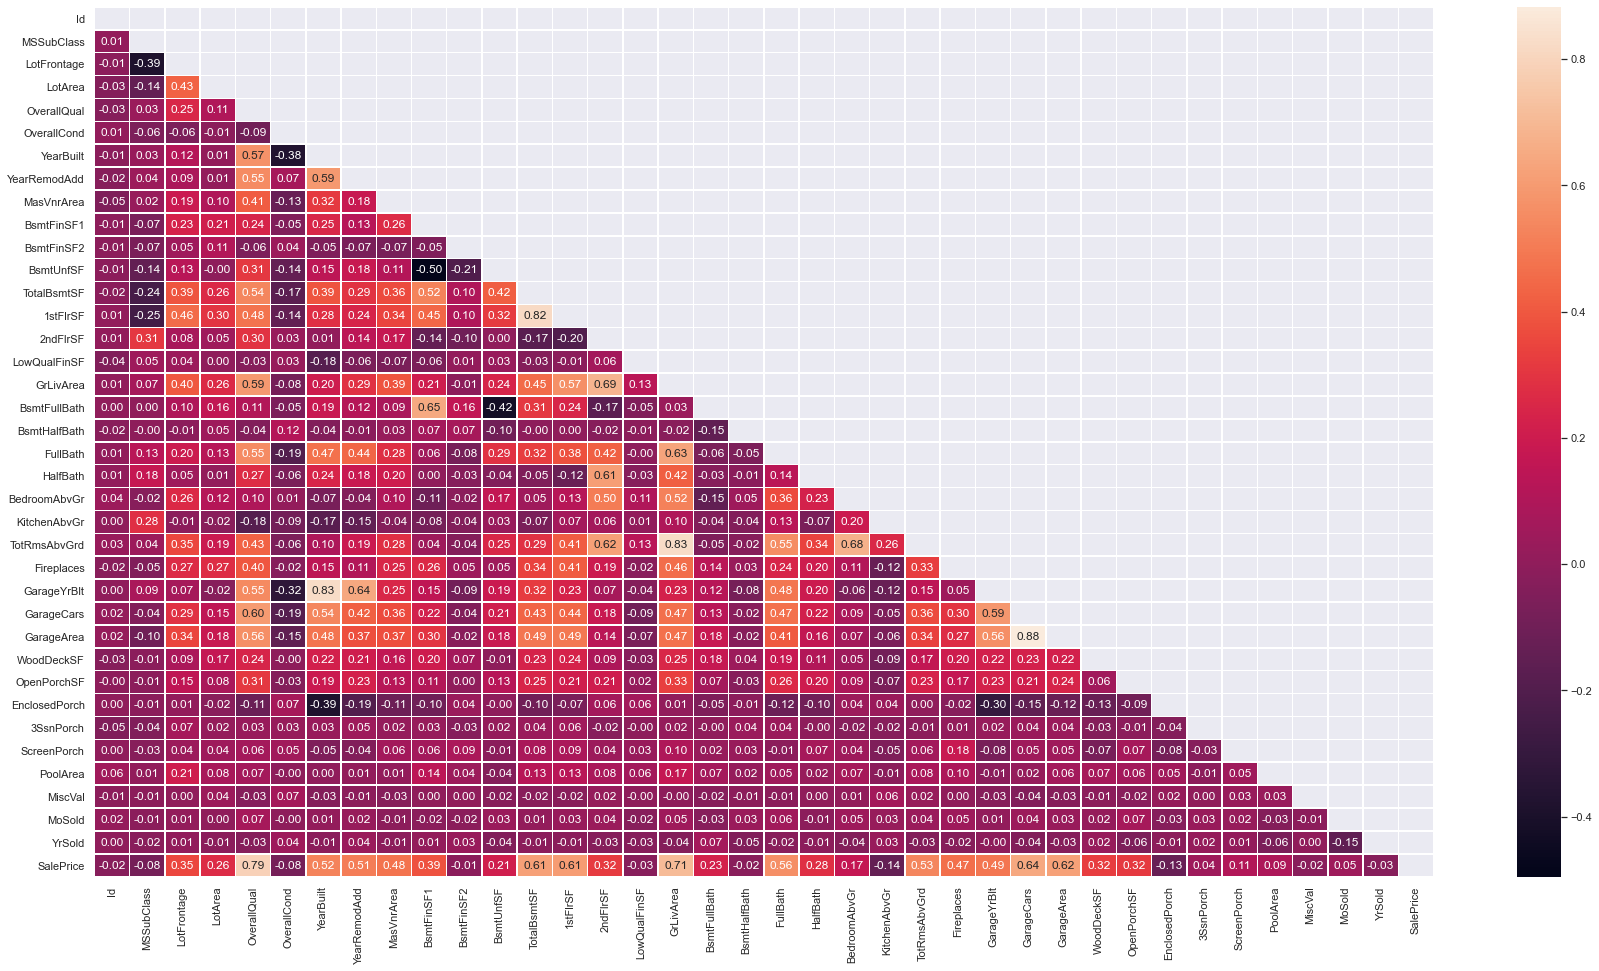

In [43]:
# final_corr
# 그림 사이즈 지정
fig, ax = plt.subplots( figsize=(30,16) )

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(final_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다

sns.heatmap(final_corr,  
            annot = True,   # 실제 값을 표시한다
            fmt = ".2f",
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            #cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            #vmin = -1,
            #vmax = 1,   
            Linewidths=0.5
           )  
